In [1]:
import copy
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm, Normalize
from IPython.display import clear_output
# settings
# plt.style.use("fivethirtyeight")

try:
    import PyBlastAfterglowMag as PBA
except:
    raise ImportError("Cannot import PyBlastAfterglowMag")
try:
    import afterglowpy as grb
except:
    afterglowpy = False
    print("Error! could not import afteglowpy")

from grbafg.tools import *
from settings import SettingsTopHat

curdir = os.getcwd() + '/'

figs = os.getcwd()+"/figs/"
out = os.getcwd()+"/out/"
pdfs = "/home/vsevolod/Work/GIT/overleaf/grb_model_paper/figs/"

In [2]:
df_structure = pd.DataFrame.from_dict(SettingsTopHat.structure,orient='index').T
df_structure["Eiso_c"] = df_structure["Eiso_c"].astype(float)
df_pars = pd.DataFrame.from_dict(SettingsTopHat.pars)
display(df_structure.head())
display(df_pars.head())

,struct,Eiso_c,Gamma0c,M0c,theta_c,theta_w,nlayers_pw,nlayers_a
0,tophat,1.000000e+53,1000.0,-1.0,0.1,0.1,150,1


,skymap_times,obs_freq,n_ism,eps_e_fs,d_l,eps_b_fs,z,p_fs,theta_obs,nsublayers
0,1.0,3.000000e+09,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
1,10.0,3.000000e+09,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
2,40.0,3.000000e+09,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
3,100.0,3.000000e+09,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1
4,200.0,3.000000e+09,10.0,0.1,3.090000e+26,0.01,0.028,2.2,1.57,1


In [3]:
grbrs = CasesFSRS(default_parfile_fpath=curdir+"parfile_def.par", workingdir=curdir+"output/")
tsk = SettingsTopHat()
tsk.pars["theta_obs"] = 0.9

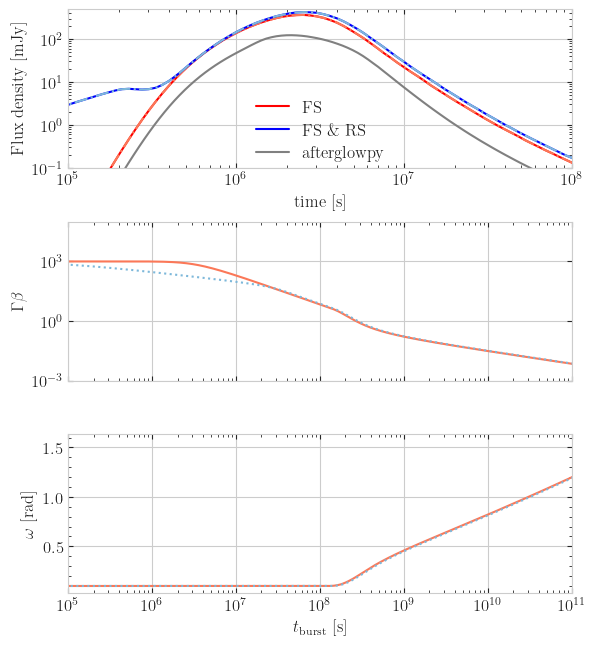

In [9]:
def paper_plot_compare_fsrs():
    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    
    grbrs.paper_plot_compare_fsrs(axes,
        pars=tsk.pars_fsrs, opts=tsk.opts_fsrs, opts_grb=tsk.opts_a_fsrs,
        struct=tsk.structure
    )
    clear_output(wait=False)

    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='lower center',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e5,1e8)
    ax.set_ylim(1e-1,5e2)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")

    ax = axes[1]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma\beta$", fontsize=12)
    ax.set_xlim(1e5,1e11)
    ax.set_ylim(1e-3,1e5)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    ax = axes[2]
    # ax.grid()
    # ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("linear")
    ax.set_ylabel(r"$\omega$ [rad]", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1e5,1e11)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    plt.tight_layout()
    # print("Saving:\n {}".format(paperfigdir+"abstract_spread_lcs_dyn.pdf"))
    # plt.savefig(paperfigdir+"abstract_spread_lcs_dyn.pdf")
    # plt.savefig(paperfigdir+"abstract_gaus_spread_lcs_dyn.png", dpi=256)
    # plt.show()
    figname = "abstract_tophat_fsrs_lcs_dyn"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
paper_plot_compare_fsrs()    

In [5]:
# Top hat grb does not have resolution
def paper_plot_resolution_rs():
    fig, ax = plt.subplots(figsize=(4.6,3.5), ncols=1, nrows=1)
    grbrs.paper_plot_resolution_rs(ax=ax,struct=tsk.structure, pars=tsk.pars_fsrs, opts_a=tsk.opts_a_fsrs, layers=(),
                                   resolutions_a=tsk.resolutions_a)
    clear_output(wait=False)
    
    
    ax.legend(fancybox=True, loc='upper left',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e5,1e8)
    ax.set_ylim(1e-2,2e2)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")
    # ax.set_facecolor("gray")
    plt.tight_layout()

    figname = "abstract_fsrs_resolution_lcs"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
# paper_plot_resolution_rs()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


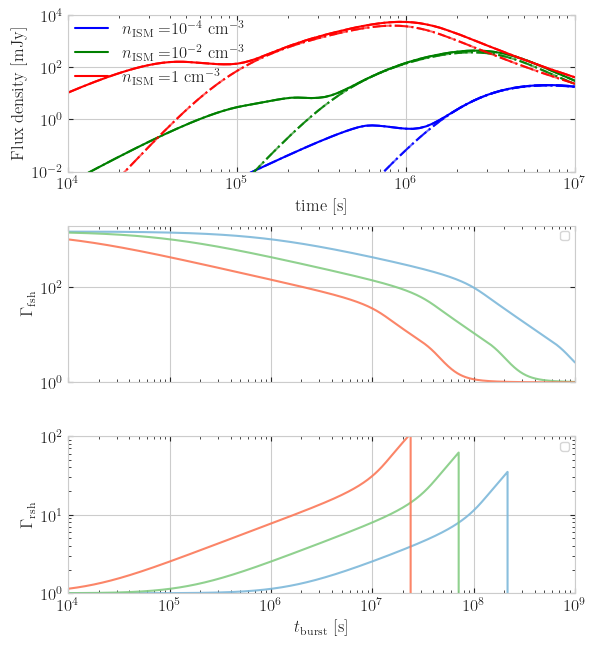

In [6]:
def compare_grbs():
    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    grbrs.compare_grbs(
        axes, 
        struct=tsk.structure, pars=tsk.pars_fsrs, opts_a=tsk.opts_a, 
        opts_a_grb=tsk.opts_a_fsrs, layers=(0,10,20,30,40,49),
        setups = (
            {"n_ism":1.e-4,"color":"blue","cmap":"Blues","label":r"$n_{\rm ISM}=$"+"$10^{-4}$ cm$^{-3}$"},
            {"n_ism":1.e-2,"color":"green","cmap":"Greens","label":r"$n_{\rm ISM}=$"+"$10^{-2}$ cm$^{-3}$"},
            {"n_ism":1.,"color":"red","cmap":"Reds","label":r"$n_{\rm ISM}=$"+"$1$ cm$^{-3}$"}
        )
    )
    clear_output(wait=False)
    
    
    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='upper left',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e4,1e7)
    ax.set_ylim(1e-2,1e4)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")

    ax = axes[1]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm fsh}$", fontsize=12)
    ax.set_xlim(1e4,1e9)
    ax.set_ylim(1e0,2e3)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    ax = axes[2]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm rsh}$", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1.e4,1e9)
    ax.set_ylim(1.e0,100.)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    plt.tight_layout()
    figname = "abstract_fsrs_resolution_lcs"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
compare_grbs()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


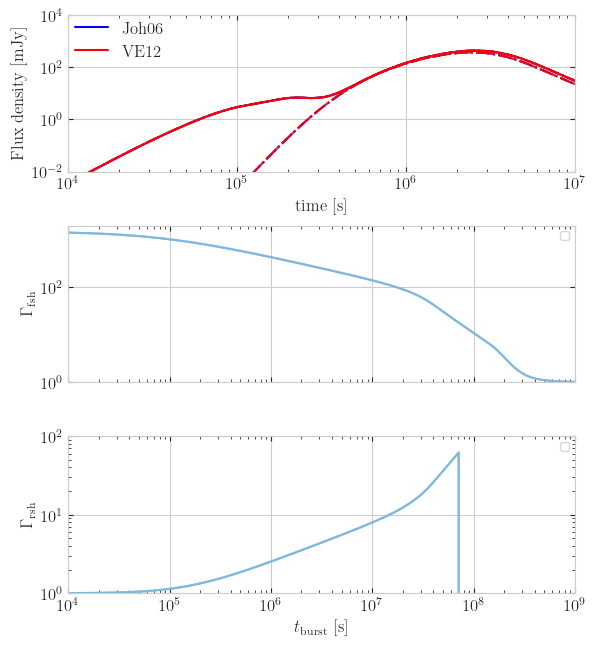

In [8]:
def compare_grbs():
    fig, axes = plt.subplots(figsize=(6,6.5), ncols=1, nrows=3)
    grbrs.compare_grbs(
        axes,
        struct=tsk.structure, pars=tsk.pars_fsrs, opts_a=tsk.opts_a,
        opts_a_grb=tsk.opts_a_fsrs, layers=(0,10,20,30,40,49),
        setups = (
            {"method_synchrotron_fs":"Joh06","color":"blue","cmap":"Blues","label":"Joh06"},
            {"method_synchrotron_fs":"WSPdN99","color":"red","cmap":"Blues","label":"VE12"},
        )
    )
    clear_output(wait=False)


    # plot
    ax = axes[0]
    # ax.grid()
    ax.legend(fancybox=True, loc='upper left',
              # bbox_to_anchor=(0.5, 0.5),  # loc=(0.0, 0.6),  # (1.0, 0.3), # <-> |
              shadow=False, ncol=1, fontsize=12,
              framealpha=0., borderaxespad=0.)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("time [s]", fontsize=12)
    ax.set_ylabel("Flux density [mJy]", fontsize=12)
    # ax.set_title(title)
    ax.set_xlim(1e4,1e7)
    ax.set_ylim(1e-2,1e4)
    # ax.grid()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    # ax.set_facecolor("pink")

    ax = axes[1]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm fsh}$", fontsize=12)
    ax.set_xlim(1e4,1e9)
    ax.set_ylim(1e0,2e3)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    ax = axes[2]
    # ax.grid()
    ax.legend()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"$\Gamma_{\rm rsh}$", fontsize=12)
    ax.set_xlabel(r"$t_{\rm burst}$ [s]", fontsize=12)
    ax.set_xlim(1.e4,1e9)
    ax.set_ylim(1.e0,100.)
    ax.tick_params(axis='both', which='both', labelleft=True,
                   labelright=False, tick1On=True, tick2On=True,
                   labelsize=12,
                   direction='in',
                   bottom=True, top=True, left=True, right=True)
    ax.minorticks_on()
    # ax.set_facecolor("pink")

    plt.tight_layout()
    figname = "abstract_fsrs_resolution_lcs"
    plt.savefig(pdfs+figname+".pdf")
    plt.savefig(pdfs+figname+".png", dpi=256)
    plt.show()
compare_grbs()